# Algoritmo de Grover

*Ciencias Naturales y Tecnología*

Sergio Tello

---

Algoritmo cuántico para búsqueda desarrollado por Lov Grover en 1996.

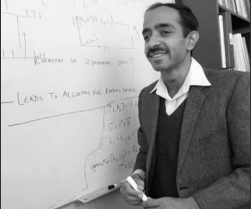

Si nos dan una función $f:\{0,1\}^n \rightarrow \{0,1\}$ el algoritmo de Grover responde a la pregunta:


**¿Para cuáles cadenas $\mathbf{x}$ del conjunto de salida se tiene que $f(\mathbf{x}) = 1$?**

Observaciones:

* Lo más común es que sea una función que cumpla $f(\mathbf{x}) = 1$ para sólo una cadena y el objetivo será encontrar el valor de esa cadena $\mathbf{x}$. 

* Si se cumple lo anterior debemos tener en cuenta que *clásicamente* el valor esperado del número de veces que debemos consultar el oráculo antes de hallar la cadena ganadora es igual a:

$$\frac{2^n + 1}{2}$$

* Usando el algoritmo de Grover el número de veces que debemos consultar el oráculo es de máximo:

$$\left\lceil \frac{\pi}{4}\sqrt{2^n} \right\rceil$$

En esta tabla podemos ver la comparación entre estas dos cantidades para distintos valores de $n$: 

| $n$  | Número de cadenas | Clásico | Cuántico |
| ---- | ----------------- | ------- | -------- |
| 2    |    4              |   3     | 2        |
| 3    |    8              |   5     | 3        |
| 4    |    16             |  9      | 4        |
| 5    |    32             |  17     | 5        |
| 6    |    64             |  33     | 7        |
| 7    |    128            |  65     | 9        |
| 8    |    256            |  129    | 13       |
| 9    |    512            |  257    | 18       | 
| 10   |    1024           |  513    | 26       | 

<p style="text-align: center;">Número de consultas al oráculo</p>

In [1]:
# Importación de librerías
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

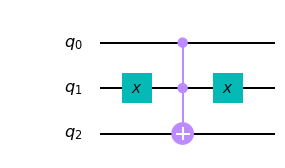

In [2]:
circuito1 = QuantumCircuit(3)
circuito1.x(1)
circuito1.ccx(0, 1, 2) 
#circuito1.cx(1, 2)
circuito1.x(1)

circuito1.draw(output='mpl')

Este circuito codifica la función $f:\{0,1\}^2 \rightarrow \{0,1\}$ para la cual: $f(10) = 1$ y $f(x) = 0$ para las otras 3 cadenas $x$ de longitud 2.

In [3]:
orac_1 = circuito1.to_gate()
orac_1.name = 'Oráculo Grover'

### Tabulación clásica del oráculo (no es el algoritmo de Grover)

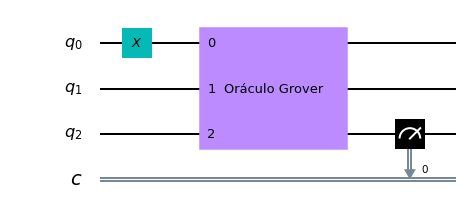

In [4]:
tabular_f = QuantumCircuit(3, 1)
tabular_f.x(0)
#tabular_f.x(1)

tabular_f.append(orac_1, [0, 1, 2])
tabular_f.measure(2, 0)
tabular_f.draw(output='mpl')

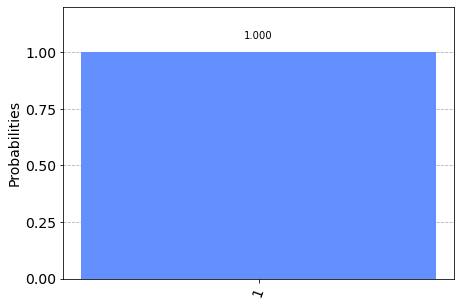

In [5]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(tabular_f, backend=simulador, shots=1).result().get_counts()
plot_histogram(conteos)

**Fin del demo de tabulación clásica**

## Operador de difusión
Este operador es el que diferencia al algoritmo de Grover del algoritmo de Deutsch-Jozsa

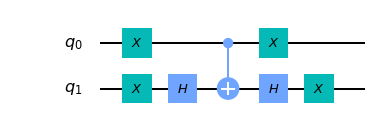

In [6]:
c_oper1 = QuantumCircuit(2)
c_oper1.x([0, 1])
#c_oper1.barrier()
c_oper1.h(1)
c_oper1.cx(0, 1)
c_oper1.h(1)
#c_oper1.barrier()
c_oper1.x([0, 1])
c_oper1.draw(output='mpl')

In [7]:
dif_1 = c_oper1.to_gate()
dif_1.name = 'Difusión'

## Circuito del algoritmo de Grover

In [8]:
grover1 = QuantumCircuit(3, 2)
grover1.x(2)
grover1.barrier()
grover1.h([0, 1, 2])
##
grover1.append(orac_1, [0, 1, 2])
grover1.h([0, 1])
grover1.append(dif_1, [0, 1])
grover1.h([0, 1])
##
grover1.measure([0, 1], [0, 1])

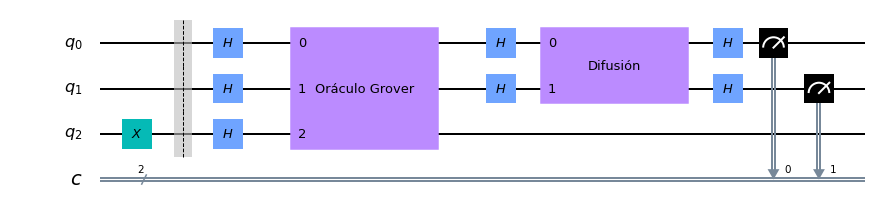

In [9]:
grover1.draw(output='mpl')

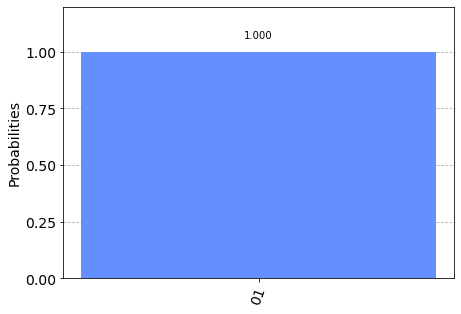

In [10]:
simulador = Aer.get_backend('qasm_simulator')
conteos1 = execute(grover1, backend=simulador, shots=1).result().get_counts()
plot_histogram(conteos1)

Podemos ver que nuestro estado de salida es el $10$, el cual corresponde a la cadena que hace que $f(10) = 1$.

## Demo del algoritmo de Grover para $n=4$

In [11]:
circuito = QuantumCircuit(5)
circuito.x([1])
circuito.mct([0, 1, 2, 3], 4) # Multicontrolled Toffoli
circuito.x([1])

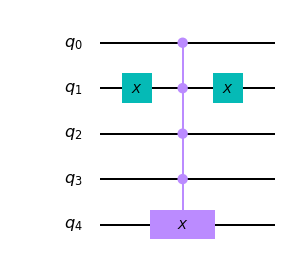

In [12]:
circuito.draw(output='mpl')    #Ahora, construir un circuito para una función que cumpla
                               # f(1011) = 1, f(0100) = 1 y de resto valga 0. (es sólo modificar el circuito que
                               # ya tenemos)

In [13]:
orac = circuito.to_gate()
orac.name = 'Oráculo Grover n = 4'

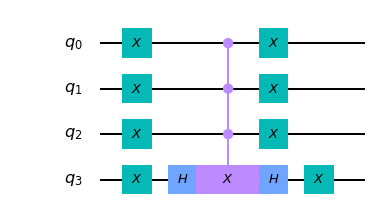

In [14]:
dif = QuantumCircuit(4)
dif.x([0, 1, 2, 3])
dif.h(3)
dif.mct([0, 1, 2], 3)
dif.h(3)
dif.x([0, 1, 2, 3])
dif.draw(output='mpl')

In [15]:
diff = dif.to_gate()
diff.name = 'Difusión n = 4'

**09/11/2020**

In [51]:
circuitoGrover = QuantumCircuit(5,4)
circuitoGrover.x(4)
circuitoGrover.barrier()
circuitoGrover.h(0)
circuitoGrover.h(1)
circuitoGrover.h(2)
circuitoGrover.h(3)
circuitoGrover.h(4)

circuitoGrover.append(orac,[0,1,2,3,4])

circuitoGrover.h(0)
circuitoGrover.h(1)
circuitoGrover.h(2)
circuitoGrover.h(3)


circuitoGrover.append(diff,[0,1,2,3])

circuitoGrover.h(0)
circuitoGrover.h(1)
circuitoGrover.h(2)
circuitoGrover.h(3)


#circuitoGrover.barrier()

#circuitoGrover.append(orac,[0,1,2,3,4])

#circuitoGrover.h(0)
#circuitoGrover.h(1)
#circuitoGrover.h(2)
#circuitoGrover.h(3)


#circuitoGrover.append(diff,[0,1,2,3])

#circuitoGrover.h(0)
#circuitoGrover.h(1)
#circuitoGrover.h(2)
#circuitoGrover.h(3)

#circuitoGrover.barrier()

#circuitoGrover.append(orac,[0,1,2,3,4])

#circuitoGrover.h(0)
#circuitoGrover.h(1)
#circuitoGrover.h(2)
#circuitoGrover.h(3)


#circuitoGrover.append(diff,[0,1,2,3])

#circuitoGrover.h(0)
#circuitoGrover.h(1)
#circuitoGrover.h(2)
#circuitoGrover.h(3)

circuitoGrover.measure([0, 1], [0, 1])
circuitoGrover.measure([2, 3], [2, 3])



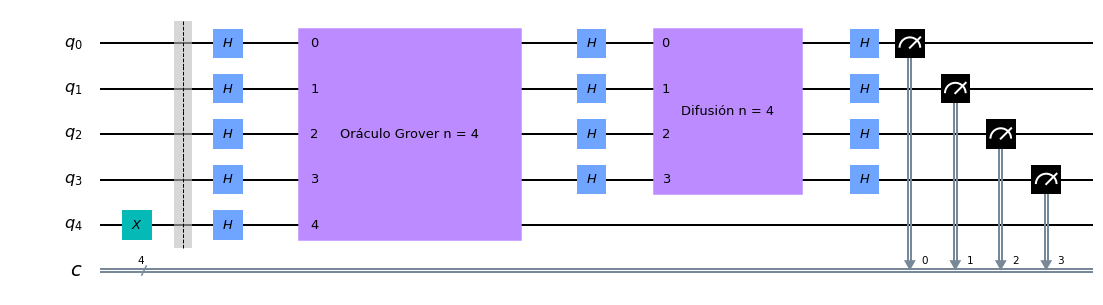

In [52]:
circuitoGrover.draw(output='mpl')

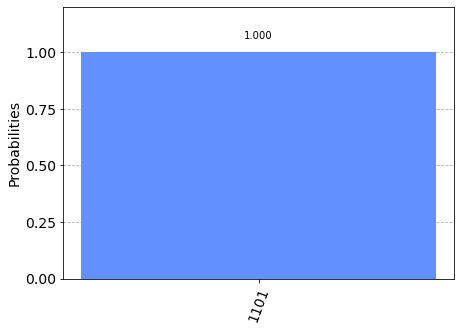

In [53]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuitoGrover, backend=simulador, shots=1).result().get_counts()
plot_histogram(conteos)

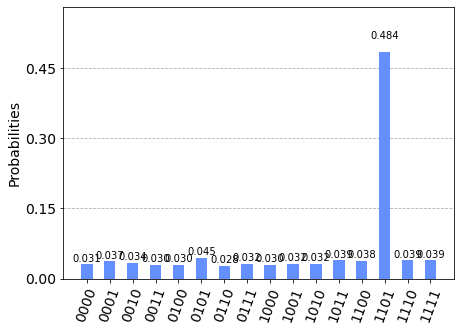

In [54]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuitoGrover, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

**DOS ESTADOS GANADORES**

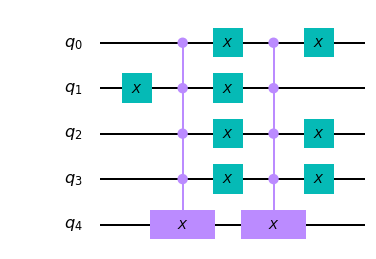

In [72]:
circuito2 = QuantumCircuit(5)
circuito2.x(1)
circuito2.mct([0, 1, 2, 3], 4) 
circuito2.x(1)
##
circuito2.x([0,2,3])
circuito2.mct([0,1,2,3],4)
circuito2.x([0,2,3])
circuito2.draw('mpl')

In [73]:
orac2 = circuito2.to_gate()

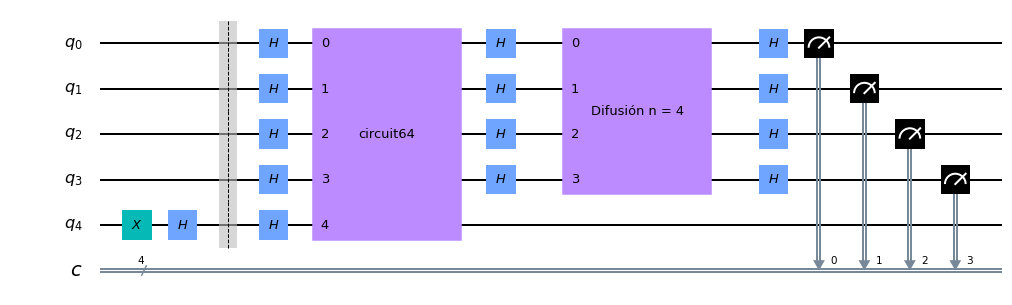

In [74]:
circuitoGrover2 = QuantumCircuit(5,4)
circuitoGrover2.x(4)
circuitoGrover2.h(4)
circuitoGrover2.barrier()
circuitoGrover2.h(0)
circuitoGrover2.h(1)
circuitoGrover2.h(2)
circuitoGrover2.h(3)
circuitoGrover2.h(4)

circuitoGrover2.append(orac2,[0,1,2,3,4])

circuitoGrover2.h(0)
circuitoGrover2.h(1)
circuitoGrover2.h(2)
circuitoGrover2.h(3)


circuitoGrover2.append(diff,[0,1,2,3])

circuitoGrover2.h(0)
circuitoGrover2.h(1)
circuitoGrover2.h(2)
circuitoGrover2.h(3)


circuitoGrover2.measure([0, 1], [0, 1])
circuitoGrover2.measure([2, 3], [2, 3])

circuitoGrover2.draw(output='mpl')

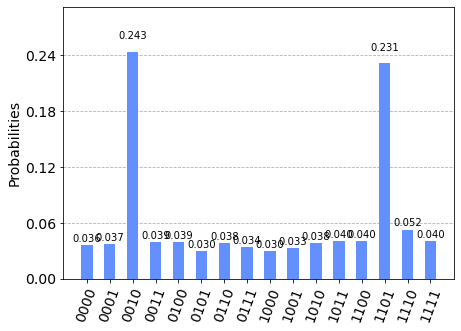

In [75]:
simulador = Aer.get_backend('qasm_simulator')
conteos2 = execute(circuitoGrover2, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos2)